# Visualizing Drought Data as Shape

In [1]:
import pandas as pd
import geopandas as gpd

import seaborn as sns
import folium

In [2]:
csv_file = '../DOAE spatial data/ภัยแล้ง/csv/droght_62.csv'
shp_file = '../DOAE spatial data/ภัยแล้ง/droght_62_4326/droght_62_4326.shp'

In [3]:
drought_62 = pd.read_csv(csv_file)
drought_62.head()

,prov_namt,amp_namt,tam_namt,prov_code,amphoe_idn,tambon_idn,des_th
0,กระบี่,เหนือคลอง,โคกยาง,81,8108,810805,4
1,กรุงเทพมหานคร,คลองสามวา,สามวาตะวันออก,10,1046,104602,3
2,กรุงเทพมหานคร,หนองจอก,กระทุ่มราย,10,1003,100301,3
3,กรุงเทพมหานคร,หนองจอก,คลองสิบ,10,1003,100303,3
4,กรุงเทพมหานคร,หนองจอก,คลองสิบสอง,10,1003,100304,3


In [4]:
data = gpd.read_file(shp_file, encoding='utf-8')
data.head()

,prov_namt,amp_namt,tam_namt,prov_code,amphoe_idn,tambon_idn,des_th,geometry
0,กระบี่,เหนือคลอง,โคกยาง,81,8108,810805,4-5ครั้งในรอบ10ปี,"POLYGON ((99.08176 8.09942, 99.08154 8.09745, ..."
1,กาญจนบุรี,ด่านมะขามเตี้ย,ด่านมะขามเตี้ย,71,7111,711101,<=3ครั้ง ในรอบ 10ปี,"POLYGON ((99.43470 13.83709, 99.43197 13.83562..."
2,กาญจนบุรี,ด่านมะขามเตี้ย,ด่านมะขามเตี้ย,71,7111,711101,4-5 ครั้ง ในรอบ 10ปี,"MULTIPOLYGON (((99.43203 13.84342, 99.43210 13..."
3,กาญจนบุรี,ด่านมะขามเตี้ย,ด่านมะขามเตี้ย,71,7111,711101,<=3ครั้ง ในรอบ 10ปี,"MULTIPOLYGON (((99.38551 13.85834, 99.38501 13..."
4,กาญจนบุรี,ด่านมะขามเตี้ย,ด่านมะขามเตี้ย,71,7111,711101,<=3ครั้ง ในรอบ 10ปี,"POLYGON ((99.38414 13.84919, 99.38532 13.84861..."


In [5]:
data['des_th'].unique()

array(['4-5ครั้งในรอบ10ปี', '<=3ครั้ง ในรอบ 10ปี', '4-5 ครั้ง ในรอบ 10ปี',
       '>=6ครั้ง ในรอบ 10ปี', '4-5 ครั้ง/ 10 ปี', '<=3 ครั้ง/ 10 ปี',
       '>=6 ครั้ง/ 10 ปี', '4-5 ครั้งในรอบ 10 ปี', '<=3 ครั้งในรอบ 10 ปี',
       '> 6 ครั้งในรอบ 10 ปี', '>=6 ครั้งในรอบ 10 ปี',
       '<=3ครั้งในรอบ10ปี'], dtype=object)

In [6]:
def clean_des_th(s):
    if s.startswith('4-5'):
        return '4-5ครั้ง/10ปี'
    elif s.startswith('<=3'):
        return '<=3ครั้ง/10ปี'
    else:
        return '>=6ครั้ง/10ปี'

data['type'] = data['des_th'].apply(clean_des_th)

You can plot Shapely Polygon directly in Jupyter

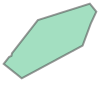

In [7]:
data.iloc[1].geometry

In [8]:
m = folium.Map([14.069446, 100.603271], zoom_start=8, tiles='cartodbpositron')
folium.GeoJson(data[:10]).add_to(m)
folium.LatLngPopup().add_to(m)
m

## Dissolve Polygons

Plotting individual polygons can be slow. Merge/Dissolve them first (https://geopandas.org/aggregation_with_dissolve.html). Still dissolve can be slow.

In [9]:
MAX_RECORDS = 1000

In [10]:
droughts = data[:MAX_RECORDS].dissolve(by='type')

In [11]:
droughts

,geometry,prov_namt,amp_namt,tam_namt,prov_code,amphoe_idn,tambon_idn,des_th
type,,,,,,,,
4-5ครั้ง/10ปี,"MULTIPOLYGON (((99.08176 8.09942, 99.08154 8.0...",กระบี่,เหนือคลอง,โคกยาง,81,8108,810805,4-5ครั้งในรอบ10ปี
<=3ครั้ง/10ปี,"MULTIPOLYGON (((99.56096 13.87954, 99.56115 13...",กาญจนบุรี,ด่านมะขามเตี้ย,ด่านมะขามเตี้ย,71,7111,711101,<=3ครั้ง ในรอบ 10ปี
>=6ครั้ง/10ปี,"MULTIPOLYGON (((99.46352 13.78173, 99.46352 13...",กาญจนบุรี,ด่านมะขามเตี้ย,หนองไผ่,71,7111,711104,>=6ครั้ง ในรอบ 10ปี


In [12]:
droughts = droughts.reindex(['<=3ครั้ง/10ปี', '4-5ครั้ง/10ปี', '>=6ครั้ง/10ปี'])
droughts

,geometry,prov_namt,amp_namt,tam_namt,prov_code,amphoe_idn,tambon_idn,des_th
type,,,,,,,,
<=3ครั้ง/10ปี,"MULTIPOLYGON (((99.56096 13.87954, 99.56115 13...",กาญจนบุรี,ด่านมะขามเตี้ย,ด่านมะขามเตี้ย,71,7111,711101,<=3ครั้ง ในรอบ 10ปี
4-5ครั้ง/10ปี,"MULTIPOLYGON (((99.08176 8.09942, 99.08154 8.0...",กระบี่,เหนือคลอง,โคกยาง,81,8108,810805,4-5ครั้งในรอบ10ปี
>=6ครั้ง/10ปี,"MULTIPOLYGON (((99.46352 13.78173, 99.46352 13...",กาญจนบุรี,ด่านมะขามเตี้ย,หนองไผ่,71,7111,711104,>=6ครั้ง ในรอบ 10ปี


In [13]:
droughts.index

Index(['<=3ครั้ง/10ปี', '4-5ครั้ง/10ปี', '>=6ครั้ง/10ปี'], dtype='object', name='type')

Set color for different labels using Seaborn color palette (https://seaborn.pydata.org/tutorial/color_palettes.html)

['#fed976', '#fd8c3c', '#e2191c']

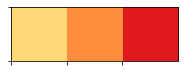

In [14]:
colorscale = sns.color_palette("YlOrRd", 3).as_hex()
sns.palplot(colorscale)
colorscale

In [15]:
colors = dict(zip(droughts.index, colorscale))

m = folium.Map([14.069446, 100.603271], zoom_start=5, tiles='cartodbpositron')

for i in range(droughts.shape[0]):
    folium.GeoJson(droughts.iloc[i:i+1], name=droughts.index[i],
                   style_function=lambda x: {'color' : colors[x['id']], 'fillColor' : colors[x['id']]}).add_to(m)
folium.LatLngPopup().add_to(m)
folium.LayerControl().add_to(m)
m

In [16]:
m.save('./output/drought_62.html')